# **Proyek Analisis Data**: E-Commerce Public Dataset
- **Nama**: Brendha adiyan vianca
- **Email**: aviancady@gmail.com
- **ID_Dicoding**: Brendha_Adiyan_Vianca

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Kota mana yang memiliki total penjualan dan total pendapatan (revenue) terbanyak dan tersedikit?
- Pertanyaan 2 : Kategori produk apa yang memiliki total penjualan dan total pendapatan (revenue) terbanyak dan tersedikit?
- Pertanyaan 3 : Berapa lama rata-rata distribusi produk dalam mendelivery produk?
- Pertanyaan 4 : Produk kategori mana memiliki rating terbaik dan terburuk pada review scores?
- Pertanyaan 3 : RFM Analysis
  1. Kapan terakhir pelanggan melakukan transaksi?
  2. Seberapa sering pelanggan melakukan pembelian dalam beberapa bulan terakhir?
  3. Berapa uang terbanyak yang dihabiskan pelanggan dalam beberapa bulan terakhir?
- Pertanyaan 4: Geo-Analysis -> Negara Bagian Mana yang Memiliki Total Penjualan Tertinggi dan Terendah?

## **Menyiapkan semua library yang dibutuhkan**

In [1]:
# DataFrame Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

## **Data Wrangling**

### **Gathering Data**

In [2]:
customers_dataset_df = pd.read_csv("data/customers_dataset.csv")
customers_dataset_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_dataset_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_dataset_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_dataset_df = pd.read_csv("data/order_items_dataset.csv")
order_items_dataset_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_dataset_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_dataset_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_dataset_df = pd.read_csv("data/order_reviews_dataset.csv")
order_reviews_dataset_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_dataset_df = pd.read_csv("data/orders_dataset.csv")
orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_name_translation_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_dataset_df = pd.read_csv("data/products_dataset.csv")
products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_dataset_df = pd.read_csv("data/sellers_dataset.csv")
sellers_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## **Assessing Data**

### **Menilai Customers_dataset_df**

In [11]:
customers_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customers_dataset_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", customers_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
customers_dataset_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Catatan:** 

Menyatukan customer_id dan customer_unique_id

### **Menilai geolocation_dataset_df**

In [15]:
geolocation_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
geolocation_dataset_df.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [17]:
geolocation_dataset_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [18]:
print("Jumlah duplikasi: ", geolocation_dataset_df.duplicated().sum())

Jumlah duplikasi:  261831


In [19]:
geolocation_dataset_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Catatan:**

Menghapus fields geolocation_lat dan geolocation_lng dan terdapat data yang duplikat

### **Menilai order_items_dataset_df**

In [20]:
order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
order_items_dataset_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [22]:
order_items_dataset_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [23]:
print("Jumlah duplikasi: ", order_items_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [24]:
order_items_dataset_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Catatan:**

Tidak menggunakan field shipping_limit_date dan reight_value

### **Menilai order_payments_dataset_df**

In [25]:
order_payments_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [26]:
order_payments_dataset_df.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [27]:
order_payments_dataset_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [28]:
print("Jumlah duplikasi: ", order_payments_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [29]:
order_payments_dataset_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Catatan:** 

Tidak menggunakan fields payment_sequential dan payment_installments

### **Menilai order_reviews_dataset_df**

In [30]:
order_reviews_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [31]:
order_reviews_dataset_df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [32]:
order_reviews_dataset_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [33]:
print("Jumlah duplikasi: ", order_reviews_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [34]:
order_reviews_dataset_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Catatan:** 

Tidak menggunakan review_creation_date dan review_answer_timestamp dan terdapat missing values pada data (akan dihapus)

### **Menilai orders_dataset_df**

In [35]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [36]:
orders_dataset_df.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [37]:
orders_dataset_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [38]:
print("Jumlah duplikasi: ", orders_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [39]:
orders_dataset_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Catatan:** 

Terdapat kesalahan tipe data datetime, akan menghapus data yang canceled dan unavaible pada fields order_status, dan memiliki missing values di beberapa fields

### **Menilai product_category_name_translation_df**

In [40]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [41]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [42]:
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())

Jumlah duplikasi:  0


In [43]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Catatan:** 

Tidak ada yang perlu diperbaiki

### **Menilai products_dataset_df**

In [44]:
products_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Catatan:** 

Harus dilakukan penggabungan dahulu dengan product_name_category_translation_df

In [45]:
products_df = pd.merge(
    left=products_dataset_df,
    right=product_category_name_translation_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

In [46]:
products_df.isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [47]:
print("jumlah duplikasi: " , products_df.duplicated().sum())

jumlah duplikasi:  0


In [48]:
products_df.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [49]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Catatan:

Beberapa field tidak digunakan. Hanya menggunakan product_id, dan product_category_name_english. Terdapat missing values juga di beberapa fields

### **Menilai sellers_dataset_df**

In [50]:
sellers_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [51]:
sellers_dataset_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [52]:
print("jumlah duplikasi: " , sellers_dataset_df.duplicated().sum())

jumlah duplikasi:  0


In [53]:
sellers_dataset_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


## Cleaning Data

### Menyatukan fields customer_id dan customer_unique_id

In [54]:
drop_duplicates = customers_dataset_df.drop_duplicates('customer_id', keep='first')
customers_dataset_df = pd.concat([ 
    drop_duplicates, customers_dataset_df[~customers_dataset_df.duplicated('customer_id', keep=False)]
])
customers_dataset_df = customers_dataset_df.reset_index(drop=True)

### Menghapus duplikat

In [55]:
geolocation_dataset_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geolocation_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


### Menghapus fields yang tidak digunakan

In [56]:
datasets = [order_items_dataset_df, geolocation_dataset_df, order_reviews_dataset_df, 
            order_payments_dataset_df, products_df]
fields = ['geolocation_lat', 'geolocation_lng', 'shipping_limit_date', 
          'freight_value', 'payment_sequential', 'payment_installments', 
          'review_comment_title', 'review_comment_message', 'review_creation_date', 
          'review_answer_timestamp', 'product_category_name', 'product_name_lenght', 
          'product_description_lenght', 'product_photos_qty', 'product_weight_g', 
          'product_length_cm', 'product_height_cm', 'product_width_cm']

In [57]:
for i in range(len(datasets)):
    datasets[i] = datasets[i].drop(columns=[col for col in fields if col in datasets[i].columns])

In [58]:
order_items_dataset_df, geolocation_dataset_df, order_reviews_dataset_df, order_payments_dataset_df, products_df = datasets

### Menghapus Missing Values

In [59]:
order_reviews_dataset_df.dropna(inplace=True)
orders_dataset_df.dropna(inplace=True)
products_dataset_df.dropna(inplace=True)

### Mengubah Datetime

In [60]:
date_time = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in date_time:
  orders_dataset_df[column] = pd.to_datetime(orders_dataset_df[column])

orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


### Mengubah urutan waktu di orders_dataset_df

In [61]:
# Filter baris yang urutannya benar
orders_dataset_df = orders_dataset_df[
    (orders_dataset_df['order_purchase_timestamp'] <= orders_dataset_df['order_approved_at']) &
    (orders_dataset_df['order_approved_at'] <= orders_dataset_df['order_delivered_carrier_date']) &
    (orders_dataset_df['order_delivered_carrier_date'] <= orders_dataset_df['order_delivered_customer_date']) &
    (orders_dataset_df['order_delivered_customer_date'] <= orders_dataset_df['order_estimated_delivery_date'])
]

## Exploratory Dataset Analyst

### Menggabungkan dataset sellers

In [62]:
print(sellers_dataset_df.columns)
print(geolocation_dataset_df.columns)

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')
Index(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'], dtype='object')


In [63]:
sellers_dataset_df.rename(columns={'seller_zip_code_prefix': 'zip_code_prefix'}, inplace=True)
geolocation_dataset_df.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'}, inplace=True)

In [64]:
# Menghapus seller_city dan seller_state
sellers_dataset_df = sellers_dataset_df.drop(columns=['seller_city','seller_state'])
sellers_dataset_df.columns

Index(['seller_id', 'zip_code_prefix'], dtype='object')

In [65]:
sellers_df = pd.merge(
    left=sellers_dataset_df,
    right=geolocation_dataset_df,
    how='left',
    left_on='zip_code_prefix',
    right_on='zip_code_prefix'
)
sellers_df.dropna(inplace=True)
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311789 entries, 0 to 311795
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   seller_id          311789 non-null  object
 1   zip_code_prefix    311789 non-null  int64 
 2   geolocation_city   311789 non-null  object
 3   geolocation_state  311789 non-null  object
dtypes: int64(1), object(3)
memory usage: 11.9+ MB


### Menggabungkan Semua Dataset

#### Menggabungkan semua orders_df

In [66]:
orders_items_df = pd.merge(
    left=orders_dataset_df,
    right=order_items_dataset_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
orders_payments_df = pd.merge(
    left=orders_items_df,
    right=order_payments_dataset_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

all_orders_df = pd.merge(
    left=orders_payments_df,
    right=order_reviews_dataset_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

In [67]:
all_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105022 entries, 0 to 105021
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       105022 non-null  object        
 1   customer_id                    105022 non-null  object        
 2   order_status                   105022 non-null  object        
 3   order_purchase_timestamp       105022 non-null  datetime64[ns]
 4   order_approved_at              105022 non-null  datetime64[ns]
 5   order_delivered_carrier_date   105022 non-null  datetime64[ns]
 6   order_delivered_customer_date  105022 non-null  datetime64[ns]
 7   order_estimated_delivery_date  105022 non-null  datetime64[ns]
 8   order_item_id                  105022 non-null  int64         
 9   product_id                     105022 non-null  object        
 10  seller_id                      105022 non-null  object        
 11  

In [68]:
orders_products_df = pd.merge(
    left=all_orders_df,
    right=products_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
orders_products_customers_df = pd.merge(
    left=orders_products_df,
    right=customers_dataset_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)

all_df = pd.merge(
    left=orders_products_customers_df,
    right=sellers_df,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)

all_df.dropna(inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22420408 entries, 0 to 22897865
Data columns (total 24 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_id                       object        
 1   customer_id                    object        
 2   order_status                   object        
 3   order_purchase_timestamp       datetime64[ns]
 4   order_approved_at              datetime64[ns]
 5   order_delivered_carrier_date   datetime64[ns]
 6   order_delivered_customer_date  datetime64[ns]
 7   order_estimated_delivery_date  datetime64[ns]
 8   order_item_id                  int64         
 9   product_id                     object        
 10  seller_id                      object        
 11  price                          float64       
 12  payment_type                   object        
 13  payment_value                  float64       
 14  review_id                      object        
 15  review_score      

In [69]:
all_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'price', 'payment_type',
       'payment_value', 'review_id', 'review_score',
       'product_category_name_english', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'zip_code_prefix', 'geolocation_city', 'geolocation_state'],
      dtype='object')

In [70]:
drop_columns = ['review_id', 'customer_id', 'order_item_id', 'product_id', 'seller_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state','zip_code_prefix']
all_df = all_df.drop(columns=drop_columns, axis=1)

In [71]:
all_df.duplicated().sum()

22279470

In [72]:
all_df.drop_duplicates(inplace=True)

In [73]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140938 entries, 0 to 22897712
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       140938 non-null  object        
 1   order_status                   140938 non-null  object        
 2   order_purchase_timestamp       140938 non-null  datetime64[ns]
 3   order_approved_at              140938 non-null  datetime64[ns]
 4   order_delivered_carrier_date   140938 non-null  datetime64[ns]
 5   order_delivered_customer_date  140938 non-null  datetime64[ns]
 6   order_estimated_delivery_date  140938 non-null  datetime64[ns]
 7   price                          140938 non-null  float64       
 8   payment_type                   140938 non-null  object        
 9   payment_value                  140938 non-null  float64       
 10  review_score                   140938 non-null  float64       
 11  pro

In [74]:
all_df = all_df.sample(frac=0.5, random_state=42)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70469 entries, 9083724 to 5375710
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       70469 non-null  object        
 1   order_status                   70469 non-null  object        
 2   order_purchase_timestamp       70469 non-null  datetime64[ns]
 3   order_approved_at              70469 non-null  datetime64[ns]
 4   order_delivered_carrier_date   70469 non-null  datetime64[ns]
 5   order_delivered_customer_date  70469 non-null  datetime64[ns]
 6   order_estimated_delivery_date  70469 non-null  datetime64[ns]
 7   price                          70469 non-null  float64       
 8   payment_type                   70469 non-null  object        
 9   payment_value                  70469 non-null  float64       
 10  review_score                   70469 non-null  float64       
 11  product_cate

In [75]:
all_df['geolocation_city'] = all_df['geolocation_city'].str.lower()

### Visualization

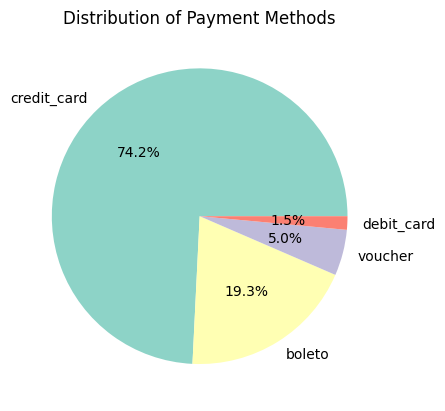

In [78]:
paytype_count = all_df['payment_type'].value_counts()

# Plotting the pie chart
plt.pie(paytype_count, labels=paytype_count.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Distribution of Payment Methods')
plt.show()

Credit Cards were a preferred method of payment for majority of orders.

### **Order reviews**

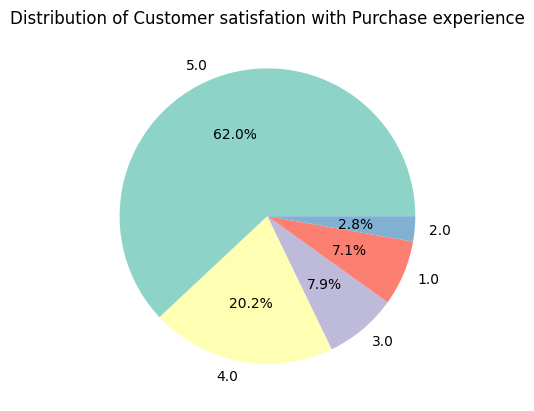

In [79]:
reviewscore = all_df['review_score'].value_counts()

# Plotting the pie chart
plt.pie(reviewscore, labels=reviewscore.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Distribution of Customer satisfation with Purchase experience')
plt.show()

majority of customers were satisfied with the purchase experience, but a significant portion (10% were customers gives 1 and 2 star) were dissatisfied.

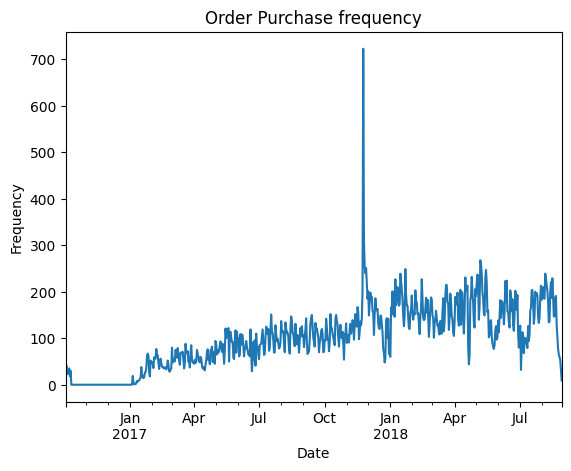

In [80]:
purchase = all_df.resample('D', on='order_purchase_timestamp').size()

purchase.plot(kind='line', linestyle='-')
plt.title('Order Purchase frequency')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

Purchases peaked during mid-November to mid-December of 2017.

### **Product category name translation**

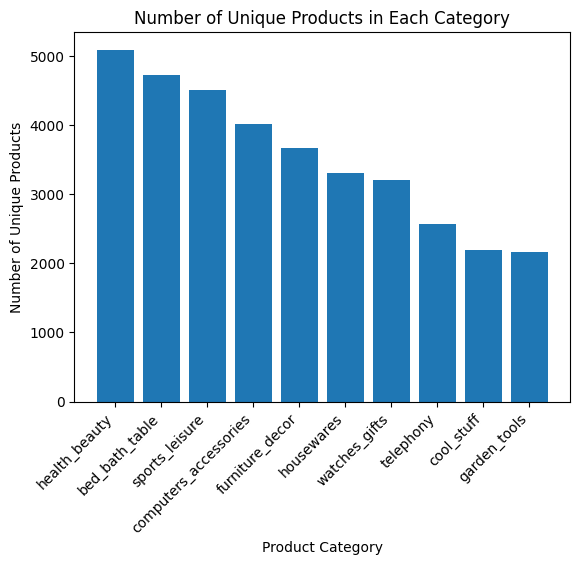

In [81]:
product_counts = all_df.groupby('product_category_name_english')['order_id'].nunique().sort_values(ascending=False).reset_index().head(10)

plt.bar(product_counts['product_category_name_english'], product_counts['order_id'])
plt.xlabel('Product Category')
plt.ylabel('Number of Unique Products')
plt.title('Number of Unique Products in Each Category')
plt.xticks(rotation=45, ha='right')
plt.show()

### **Exploring the correlation between variables**

1a. Cities generating highest orders

C:\Users\USER\AppData\Local\Temp\ipykernel_13012\3214491909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "order_id", y = "geolocation_city", data = topcities_orders, palette = "viridis_r")


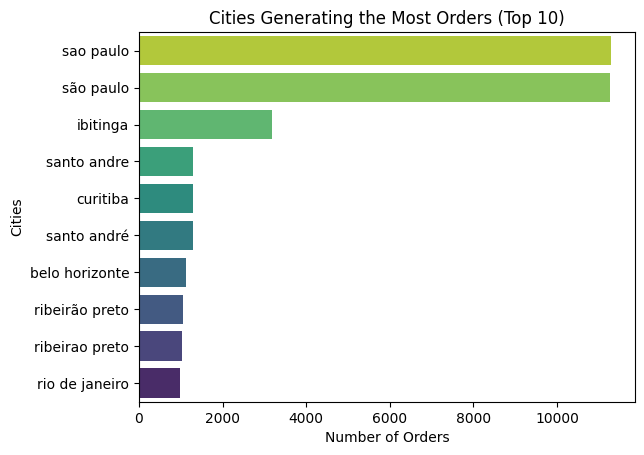

In [100]:
topcities_orders = all_df.groupby("geolocation_city")["order_id"].count().reset_index().sort_values("order_id", ascending = False).head(10)
sns.barplot(x = "order_id", y = "geolocation_city", data = topcities_orders, palette = "viridis_r")

plt.xlabel("Number of Orders")
plt.ylabel("Cities")
plt.title("Cities Generating the Most Orders (Top 10)")
plt.show()

Sau Paulo (city) had the most number of unique customers

1b. Cities generating most revenue

C:\Users\USER\AppData\Local\Temp\ipykernel_13012\1743727882.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "payment_value", y = "geolocation_city", data = topcities_revenue, palette = 'viridis_r')


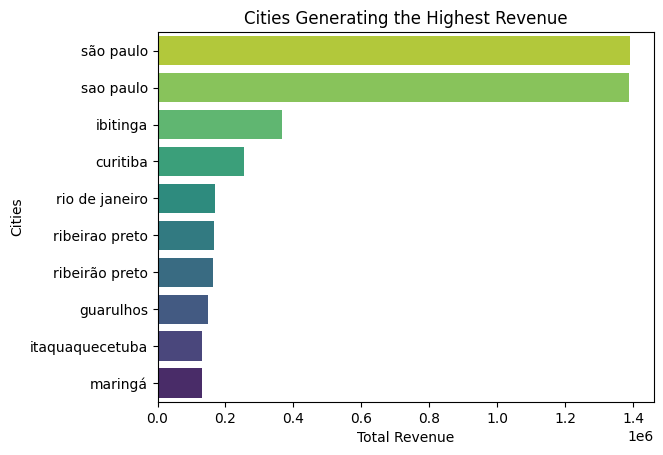

In [106]:
topcities_revenue = all_df.groupby("geolocation_city")["payment_value"].sum().reset_index().sort_values("payment_value", ascending = False).head(10)

sns.barplot(x = "payment_value", y = "geolocation_city", data = topcities_revenue, palette = 'viridis_r')
plt.xlabel("Total Revenue")
plt.ylabel("Cities")
plt.title("Cities Generating the Highest Revenue")
plt.show()

Sau Paulo (city) had the most Total revenue of customers

2. Product Categories with highest & lowest number of orders

C:\Users\USER\AppData\Local\Temp\ipykernel_13012\3648530016.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "order_id", y = "product_category_name_english", data = toporders_productcat, palette='gnuplot_r', ax=ax[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_13012\3648530016.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "order_id", y = "product_category_name_english", data = loworders_productcat, palette='gnuplot', ax=ax[1])


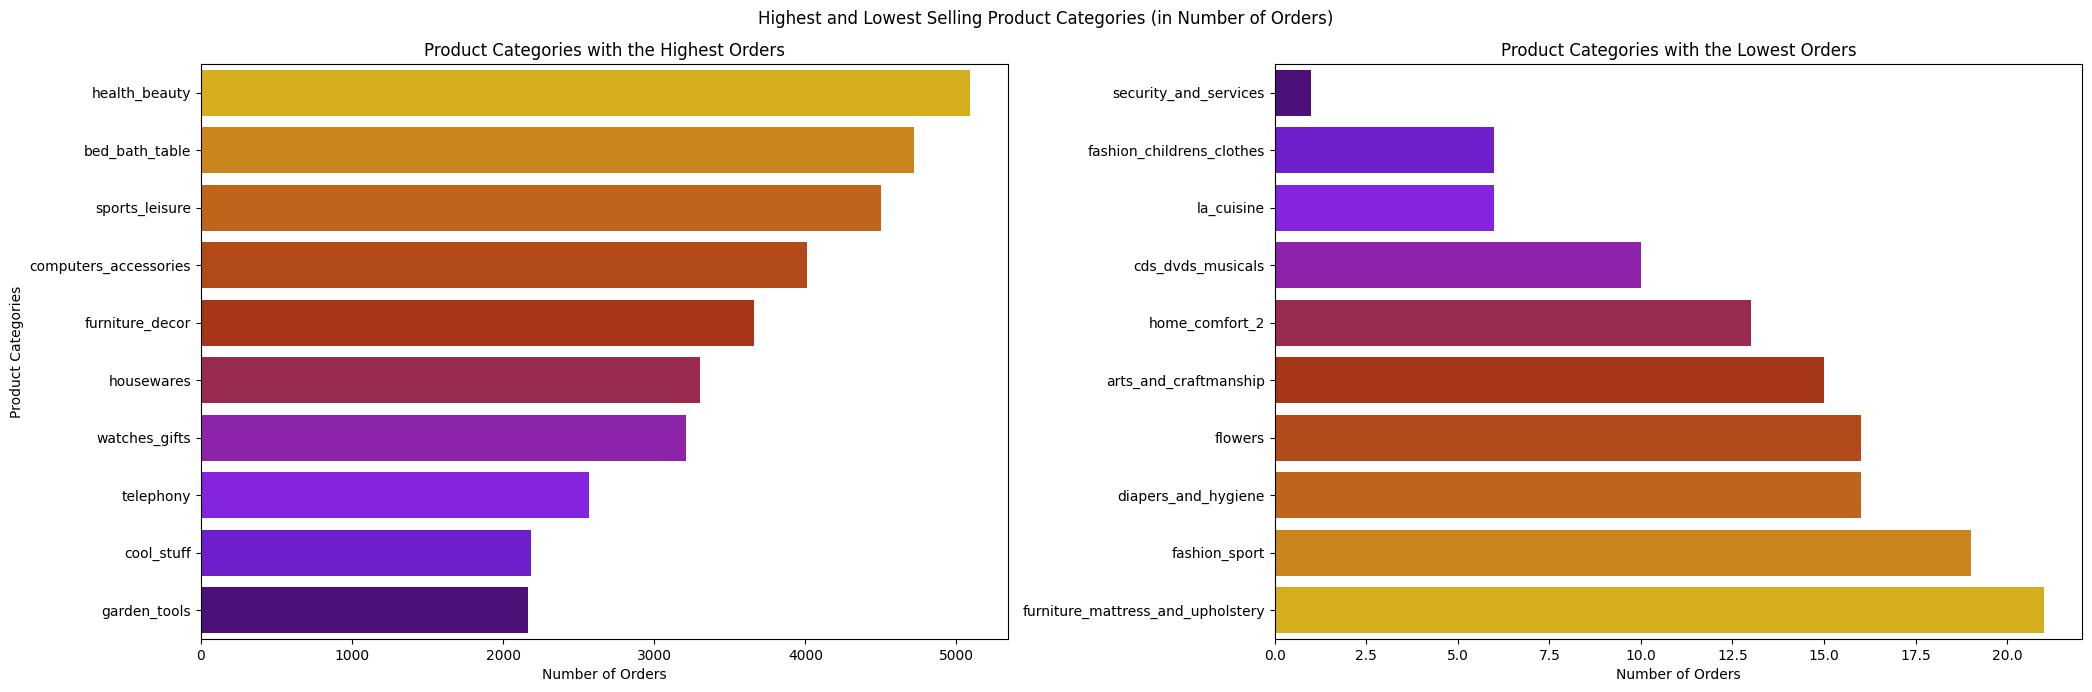

In [108]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(21, 7))

# Highest no. of orders
toporders_productcat = all_df.groupby(all_df["product_category_name_english"])["order_id"].nunique().reset_index().sort_values("order_id", ascending=False).head(10)

sns.barplot(x = "order_id", y = "product_category_name_english", data = toporders_productcat, palette='gnuplot_r', ax=ax[0])
ax[0].set_xlabel("Number of Orders")
ax[0].set_ylabel("Product Categories")
ax[0].set_title("Product Categories with the Highest Orders")

# Lowest no. of orders
loworders_productcat = all_df.groupby(all_df["product_category_name_english"])["order_id"].nunique().reset_index().sort_values("order_id", ascending=True).head(10)

sns.barplot(x = "order_id", y = "product_category_name_english", data = loworders_productcat, palette='gnuplot', ax=ax[1])
ax[1].set_xlabel("Number of Orders")
ax[1].set_ylabel("")
ax[1].yaxis.set_label_position("right")
ax[1].set_title("Product Categories with the Lowest Orders")

# title & adjustments
plt.suptitle("Highest and Lowest Selling Product Categories (in Number of Orders)")
plt.tight_layout(pad=1)
plt.show()


2. Product Categories with highest & lowest revenue generation

C:\Users\USER\AppData\Local\Temp\ipykernel_13012\2816912472.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "payment_value", y = "product_category_name_english", data = toprevenue_productcat, palette = 'gnuplot_r', ax = ax[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_13012\2816912472.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "payment_value", y = "product_category_name_english", data = lowrevenue_productcat, palette = 'gnuplot', ax = ax[1])


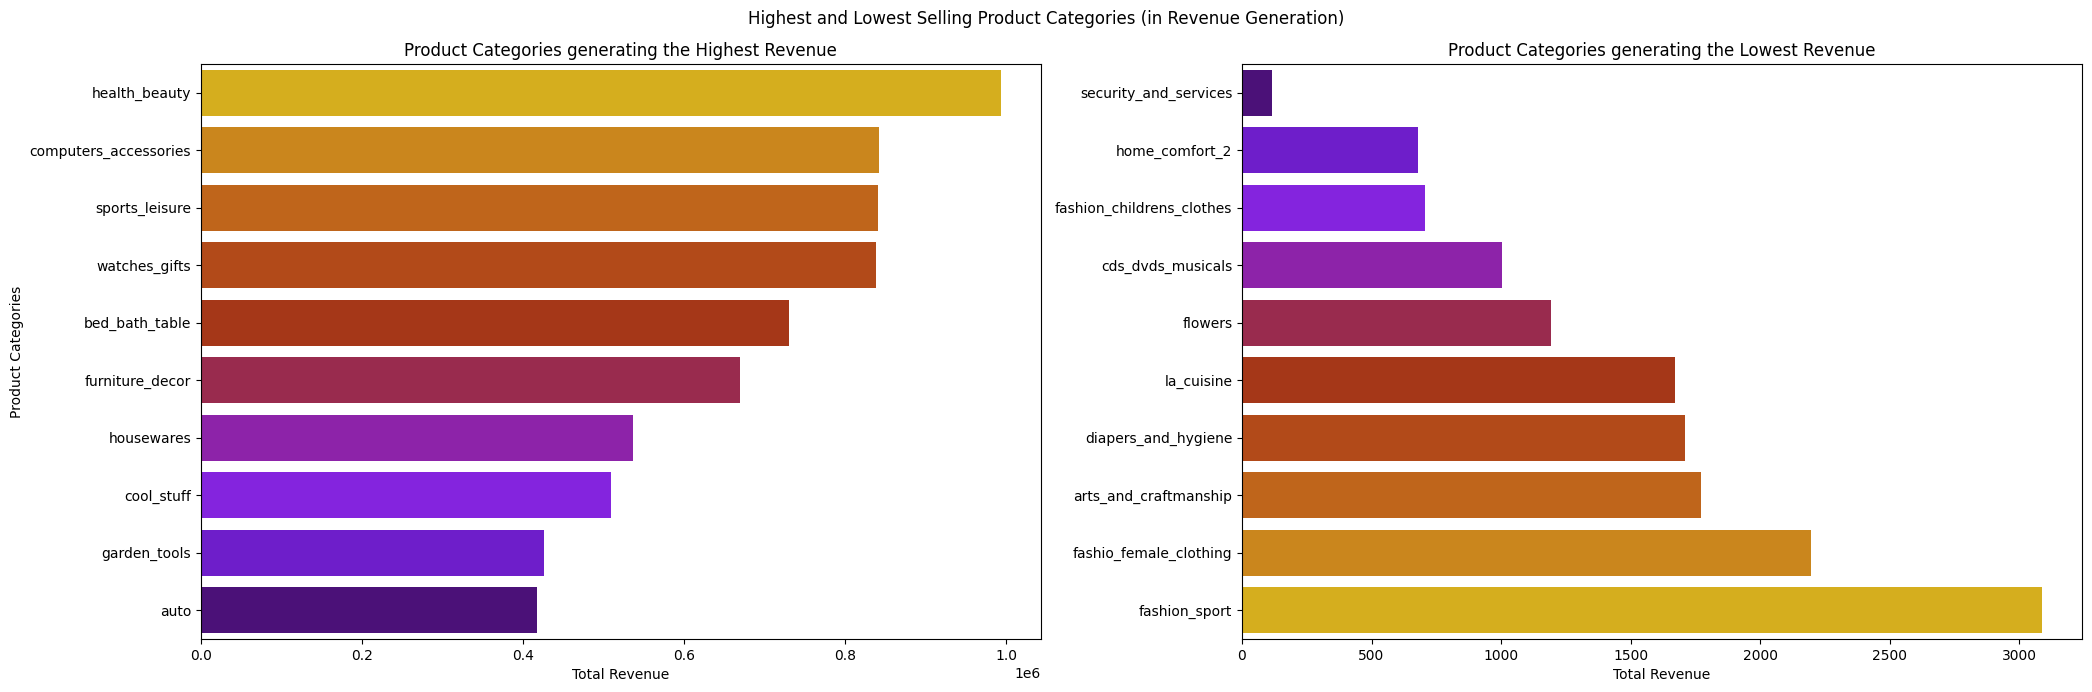

In [110]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(21, 7))

# Highest revenue generation
toprevenue_productcat = all_df.groupby(all_df["product_category_name_english"])["payment_value"].sum().reset_index().sort_values("payment_value", ascending = False).head(10)

sns.barplot(x = "payment_value", y = "product_category_name_english", data = toprevenue_productcat, palette = 'gnuplot_r', ax = ax[0])
ax[0].set_xlabel("Total Revenue")
ax[0].set_ylabel("Product Categories")
ax[0].set_title("Product Categories generating the Highest Revenue")

# Lowest revenue generation
lowrevenue_productcat = all_df.groupby(all_df["product_category_name_english"])["payment_value"].sum().reset_index().sort_values("payment_value", ascending = True).head(10)

sns.barplot(x = "payment_value", y = "product_category_name_english", data = lowrevenue_productcat, palette = 'gnuplot', ax = ax[1])
ax[1].set_xlabel("Total Revenue")
ax[1].set_ylabel("")
ax[1].yaxis.set_label_position("right")
ax[1].set_title("Product Categories generating the Lowest Revenue")

# title & adjustments
plt.suptitle("Highest and Lowest Selling Product Categories (in Revenue Generation)")
plt.tight_layout(pad=1)
plt.show()

3. Distribution of Product Delivery time

In [112]:
#Calculating delivery time for all orders:
deliveryTime = (all_df["order_delivered_customer_date"] - all_df["order_purchase_timestamp"])

#Convert the timedeltas to seconds
deliveryTime_Seconds = deliveryTime.apply(lambda x: x.total_seconds())

#Convert seconds to days by dividing by the number of seconds in a day (86400 seconds per day)
all_df['deliveryTime_Days'] = round(deliveryTime_Seconds/86400, 2)

#Summarizing the delivery time:
all_df['deliveryTime_Days'].describe()

count    70469.000000
mean        10.781919
std          6.175286
min          0.530000
25%          6.270000
50%          9.520000
75%         14.120000
max         63.740000
Name: deliveryTime_Days, dtype: float64

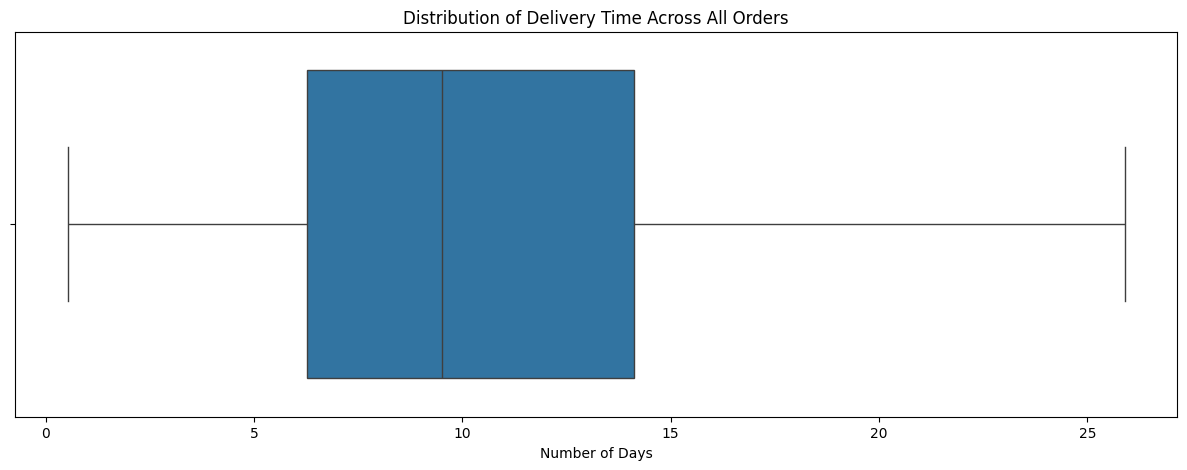

In [113]:
plt.figure(figsize = (15, 5))

sns.boxplot(all_df.deliveryTime_Days, orient = 'h', showfliers = False)
plt.xlabel("Number of Days")
plt.title('Distribution of Delivery Time Across All Orders')
plt.show()

The avg. delivery time ranges is 10 days.

4. Best & Worst performing Product Categories acc. to Review Scores

C:\Users\USER\AppData\Local\Temp\ipykernel_13012\3201211498.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "review_score", y = "product_category_name_english", data = prodCat_TopReview, palette = 'plasma', ax = ax[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_13012\3201211498.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "review_score", y = "product_category_name_english", data = prodCat_BotReview, palette = 'plasma_r', ax = ax[1])


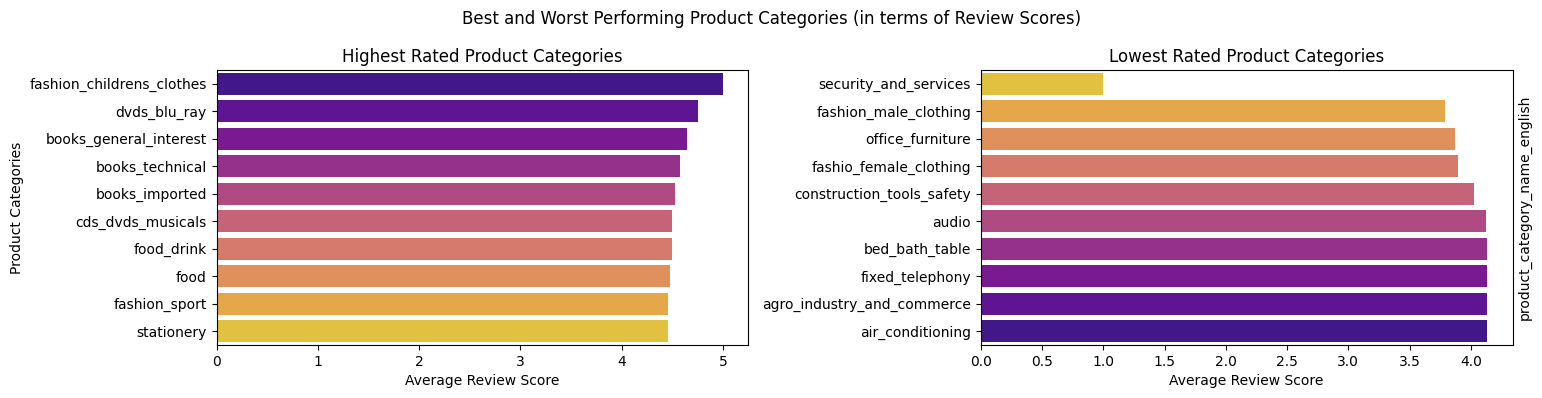

In [119]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15.5, 4))

prodCat_TopReview = all_df.groupby(all_df["product_category_name_english"])["review_score"].mean().reset_index().sort_values("review_score", ascending = False).head(10)
sns.barplot(x = "review_score", y = "product_category_name_english", data = prodCat_TopReview, palette = 'plasma', ax = ax[0])
ax[0].set_xlabel("Average Review Score")
ax[0].set_ylabel("Product Categories")
ax[0].set_title("Highest Rated Product Categories")

prodCat_BotReview = all_df.groupby(all_df["product_category_name_english"])["review_score"].mean().reset_index().sort_values("review_score", ascending = True).head(10)
sns.barplot(x = "review_score", y = "product_category_name_english", data = prodCat_BotReview, palette = 'plasma_r', ax = ax[1])
ax[1].set_xlabel("Average Review Score")
ax[1].yaxis.set_label_position("right")
ax[1].set_title("Lowest Rated Product Categories")

plt.suptitle("Best and Worst Performing Product Categories (in terms of Review Scores)")
plt.tight_layout(pad = 1)
plt.show()

Dapat dilihat bahwa rating produk tertinggi adalah fashion_childrens_clothes dan yang terpaling rendah adalah security_and_services

## **5. RFM Analysis**

RFM Analysis, bertujuan mengelompokkan pelanggan berdasarkan perilaku pembelian mereka dengan memperhatikan tiga faktor utama:
- Recency: Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian.
- Frequency: Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu.
- Monetary: Menghitung total pengeluaran pelanggan dalam periode tersebut.

In [86]:
reference_date = all_df['order_purchase_timestamp'].max()  # bisa juga gunakan tanggal tertentu

rfm_table = all_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'payment_value': 'sum'  # Monetary
}).reset_index()

rfm_table['customer_unique_id'] = range(1, len(rfm_table) + 1)

rfm_table.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

print(rfm_table.head())

   customer_id  Recency  Frequency  Monetary
0            1      114          2     54.38
1            2      320          1     43.62
2            3      287          1    196.89
3            4      145          1    166.98
4            5      131          1     35.38


In [88]:
rfm_table['R_rank'] = pd.qcut(rfm_table['Recency'], 4, labels=[4, 3, 2, 1])
rfm_table['F_rank'] = pd.qcut(rfm_table['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm_table['M_rank'] = pd.qcut(rfm_table['Monetary'], 4, labels=[1, 2, 3, 4])

rfm_table['RFM_Score'] = rfm_table['R_rank'].astype(str) + rfm_table['F_rank'].astype(str) + rfm_table['M_rank'].astype(str)

print(rfm_table[['customer_id', 'RFM_Score']].head())

   customer_id RFM_Score
0            1       331
1            2       211
2            3       213
3            4       313
4            5       311


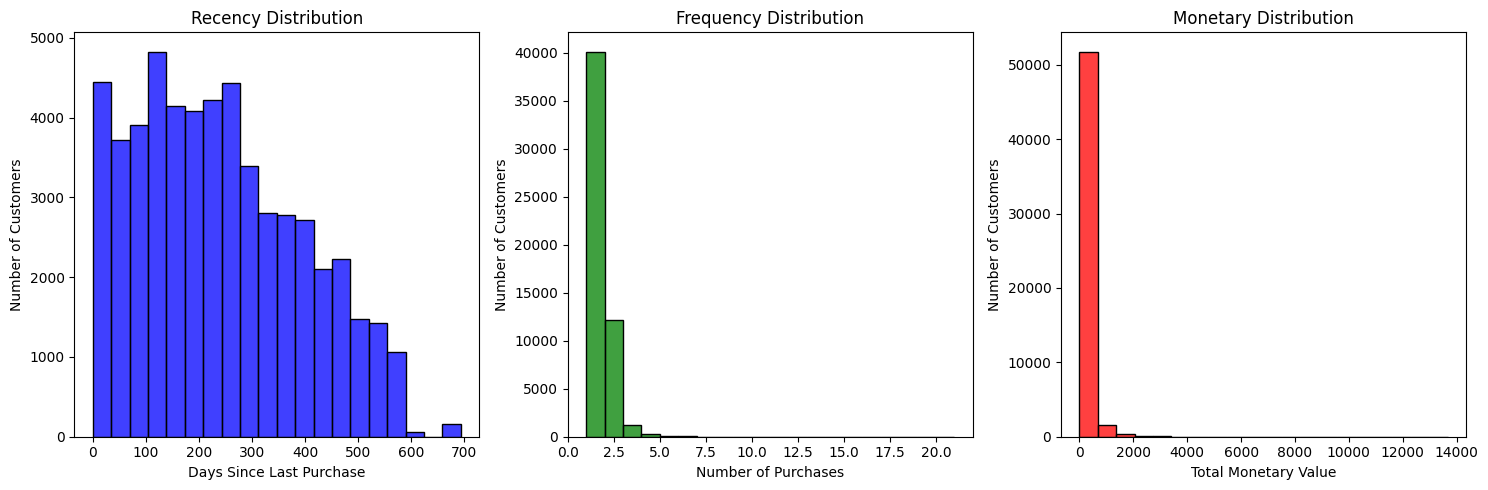

In [123]:
plt.figure(figsize=(15, 5))

# Plot Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm_table['Recency'], kde=False, bins=20, color='blue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')

# Plot Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm_table['Frequency'], kde=False, bins=20, color='green')
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')

# Plot Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm_table['Monetary'], kde=False, bins=20, color='red')
plt.title('Monetary Distribution')
plt.xlabel('Total Monetary Value')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

## **6. Geo-Analysis**

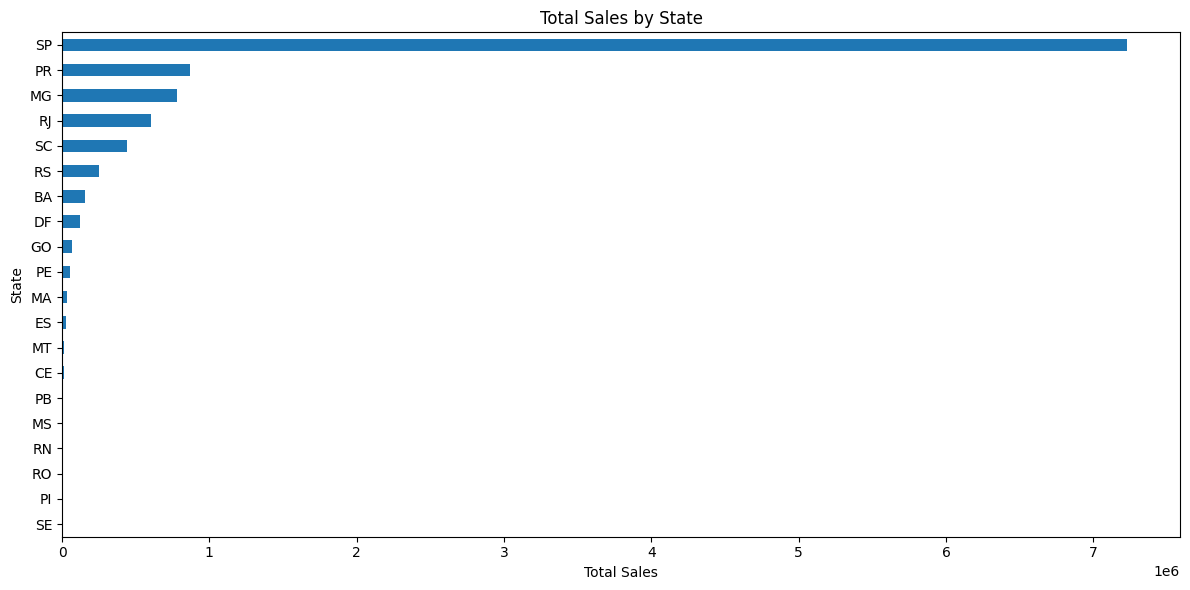

In [94]:
sales_by_state = all_df.groupby('geolocation_state')['payment_value'].sum().sort_values(ascending=True)
plt.figure(figsize=(12, 6))
sales_by_state.plot(kind='barh')
plt.title('Total Sales by State')
plt.ylabel('State')
plt.xlabel('Total Sales')
plt.tight_layout()
plt.show()

## Conclusion

- Jawaban 1 : Kota yang memiliki total penjualan terbanyak dan tersedikit adalah Sao Paulo dan Rio De Janeiro, dan total pendapatan (revenue) terbanyak dan tersedikit adalah Sao Paulo dan Maringa
- Jawaban 2 : Kategori produk apa yang memiliki total penjualan dan total pendapatan (revenue) terbanyak dan tersedikit? Kategori produk yang memiliki total penjualan dan total pendapatan yang tertinggi dan terendah adalah health_beauty dan security services. Keduanya sama, baik total penjualan dan total pendapatan.
- Jawaban 3 : Rata-rata distribusi produk dalam mendelivery produk adalah 10-11 hari dengan rentang 0 - 63 hari lamanya.
- Jawaban 4 : Produk kategori yang memiliki rating terbaik dan terburuk pada review scores adalah Fashion_childrens_clothes (terbaik) dan security and services (terburuk).
- Jawaban 5 : RFM Analysis
  1. Recency: Mayoritas pelanggan melakukan pembelian dalam 100 hingga 300 hari terakhir. Setelah 300 hari, jumlah pelanggan yang bertransaksi semakin menurun secara signifikan. Ini menunjukkan bahwa sebagian besar pelanggan adalah pelanggan yang cukup "baru", tetapi ada juga sejumlah pelanggan yang tidak melakukan pembelian lagi dalam waktu lebih lama (lebih dari 600 hari).
  2. Sebagian besar pelanggan hanya melakukan 1 hingga 2 pembelian. Ini menunjukkan bahwa mayoritas basis pelanggan adalah pembeli satu kali atau jarang bertransaksi. Hanya ada sedikit pelanggan yang melakukan lebih dari 5 pembelian, yang menunjukkan bahwa loyalitas pelanggan cenderung rendah di dataset ini.
  3. Sebagian besar pelanggan memiliki nilai belanja total yang rendah (di bawah 2000). Distribusi ini sangat miring ke kanan, dengan hanya sedikit pelanggan yang memiliki total pengeluaran yang sangat tinggi. Ini menunjukkan bahwa meskipun ada beberapa pelanggan bernilai tinggi, sebagian besar pelanggan memiliki nilai transaksi yang kecil.
- Jawaban 6: Negara Bagian yang memiliki total penjualan tertinggi dan terendah adalah Sao Paulo (tertinggi) dan Swedia (terendah)

## Main Data

In [117]:
all_df.to_csv("dashboard/all_data.csv", index=False)

In [118]:
pip install pipreqsnb

Note: you may need to restart the kernel to use updated packages.
